---

<p style='text-align: center;'>DS PROJECT</p>
<h1 align="center">Exploratory Data Analysis</h1> 
<div style="text-align: right">Created<br>
-- by Author: Kousik Naskar<br>
-- Date: 29 July 2025</div>

---

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Imports
# Data Manipulation
import pandas as pd
import numpy as np
from pyprojroot import here
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Tuple

In [2]:
#import custom config
import sys
#go up one level from notebooks
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.config.load_config import LoadConfig

In [3]:
#sns.set_theme(style="whitegrid", palette="tab10", context="notebook")
#sns.set_palette("Set2")              # pastel colours for consistency
# Set consistent plot theme and color

custom_palette = ["#219ebc", "#e63946", "#023047", "#ffb703", "#8ecae6"]
#custom_palette = ["#a6cee3", "#b2df8a", "#fdbf6f", "#cab2d6", "#ffff99"]
plt.rcParams.update({"axes.prop_cycle": plt.cycler(color=custom_palette)})

sns.set_theme(style="whitegrid", palette=custom_palette)

# About the Data
Table information about the dataset from [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset).
|      **Feature Name**      |               **Description**               |
|:--------------------------:|:-------------------------------------------:|
| person_age                 | Age                                         |
| person_income              | Annual Income                               |
| person_home_ownership      | Home ownership                              |
| person_emp_length          | Employment length (in years)                |
| loan_intent                | Loan intent                                 |
| loan_grade                 | Loan grade                                  |
| loan_amnt                  | Loan amount                                 |
| loan_int_rate              | Interest rate                               |
| loan_status                | Loan status (0 is non default 1 is default) |
| loan_percent_income        | Percent income                              |
| cb_person_default_on_file  | Historical default                          |
| cb_preson_cred_hist_length | Credit history length                       |

# Data Load

In [4]:
# ----------------------------
# Load the dataset with error handling
# ----------------------------
def load_data() -> pd.DataFrame:
    config = LoadConfig()
    data_path = config.raw_data_path

    try:
        # Construct full path using pyprojroot
        # here() returns the root directory of the project as a `Path` object from Python’s `pathlib`
        #data_path = here() / "data" / "raw" / file_name #Equivalent to: os.path.join(here(), "data", "raw", file_name)
        print(f"📂 Loading dataset from: {data_path}")

        if not data_path.exists():
            raise FileNotFoundError(f"File not found at: {data_path}")
        
        # Load CSV
        df = pd.read_csv(data_path)
        print("✅ Dataset loaded successfully.")
        return df
    
    except FileNotFoundError as e:
        print(f"❌ Error: {e}")
    except pd.errors.EmptyDataError:
        print("❌ Error: The file is empty.")
    except pd.errors.ParserError:
        print("❌ Error: The file could not be parsed.")
    except Exception as e:
        print(f"❌ An unexpected error occurred: {e}")
    
    # Return empty DataFrame if failed
    return pd.DataFrame()

In [5]:
# Load original dataset
#df_original = load_data("credit_risk_dataset.csv")
df_original = load_data()

📂 Loading dataset from: /home/kousik/work/data_science/myprojects/credit-score-modelling/data/raw/credit_risk_dataset.csv
✅ Dataset loaded successfully.


In [6]:
# Work on a copy for EDA
df = df_original.copy()

In [7]:
# Now use `df` for inspection/transformation/EDA on dataset
display(df.head())
display(df.info())
display(df.describe().T)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


# Exploratory Data Analysis

In [8]:
df.isnull().sum().sort_values(ascending=False).head(15)

loan_int_rate                 3116
person_emp_length              895
person_income                    0
person_age                       0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
## ---------------- DATA QUALITY ----------------
def data_quality_report(df: pd.DataFrame) -> pd.DataFrame:
    rep = (df.isna().agg(["sum","mean"])
             .T.rename(columns={"sum":"MissingCnt","mean":"MissingPct"}))
    rep["Dtype"] = df.dtypes
    rep["Cardinality"] = df.nunique()
    return rep

In [10]:
data_quality_report(df)

,MissingCnt,MissingPct,Dtype,Cardinality
person_age,0.0,0.000000,int64,58
person_income,0.0,0.000000,int64,4295
person_home_ownership,0.0,0.000000,object,4
person_emp_length,895.0,0.027470,float64,36
loan_intent,0.0,0.000000,object,6
loan_grade,0.0,0.000000,object,7
loan_amnt,0.0,0.000000,int64,753
loan_int_rate,3116.0,0.095639,float64,348
loan_status,0.0,0.000000,int64,2
loan_percent_income,0.0,0.000000,float64,77


## Univariate Analysis
Analyzing predictor variable one by one.

### How is the proportion of the response variable?

In [11]:
def plot_target_distribution(df: pd.DataFrame, target: str = 'loan_status') -> None:
    try:
        # Count and proportions
        counts = df[target].value_counts()
        percentages = df[target].value_counts(normalize=True)
        labels = [f"{int(label)} - {'Default' if int(label)==1 else 'Non-Default'}" for label in percentages.index]

        # Get colors from Seaborn's current palette
        colors = sns.color_palette()[:2]  # first two colors

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # --- Bar Plot ---
        ax1 = axes[0]
        bars = ax1.bar(counts.index.astype(str), counts.values, color=colors)

        ax1.set_title(f"Counts of Loan Status")
        ax1.set_xlabel("Class")
        ax1.set_ylabel("Count")
        ax1.grid(False)  # Remove ash grid

        # Annotate bar tops
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width() / 2, height + 2, str(int(height)),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

        # Add legend manually
        class_labels = [f"{int(i)} - {'Default' if int(i)==1 else 'Non-Default'}" for i in counts.index]
        ax1.legend(bars, class_labels, title="Class")

        # --- Pie Chart ---
        ax2 = axes[1]
        ax2.pie(
            percentages,
            labels=labels,
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            explode=(0.08, 0),
            shadow=True,
            textprops={'fontweight': 'bold'}
        )

        ax2.set_title("Proportions of Loan Status")
        ax2.legend(labels, title="Class", loc="upper right", bbox_to_anchor=(1.3, 1))

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error in plot_target_distribution: {e}")

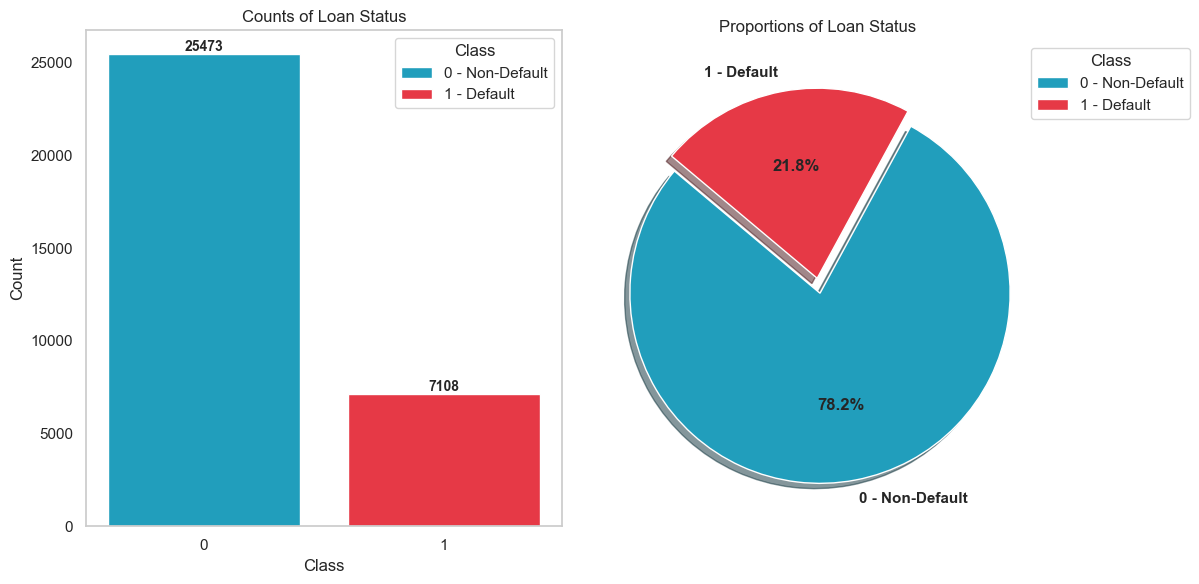

In [12]:
plot_target_distribution(df, target="loan_status")

#### Answer
The response variable is unbalanced, with Good Customers (0) making up approximately **78.2%** and Bad Customers (1) making up about **21.8%**. This imbalance is common in the credit industry, as most users are not expected to default.

### Were there missing values inside the predictor variables?

In [13]:
def plot_missing_pct(df: pd.DataFrame, save_path: str = "../reports/figures/missing_values.png") -> None:
    try:
        # Calculate missing percentages
        missing_pct = (df.isna().mean() * 100).sort_values()
        missing_pct = missing_pct[missing_pct > 0]

        if missing_pct.empty:
            print("✅ No missing values to plot.")
            return

        # Set color from Seaborn's Set2 palette
        #colors = sns.color_palette()[:len(missing_pct)]
        colors = sns.color_palette()[0]

        # Plot
        ax = missing_pct.plot(kind="barh", figsize=(10, 5), color=colors)

        plt.title("Missing Values", fontsize=14)
        plt.xlabel("Percentage of Missing Value")
        plt.ylabel("Feature")
        plt.grid(axis='x', linestyle='--', alpha=0.7)

        # Add percentage text inside bars
        for i, (val, idx) in enumerate(zip(missing_pct.values, missing_pct.index)):
            ax.text(val / 2, i, f"{val:.1f}%", va='center', ha='center', color='black', fontsize=10)

        plt.tight_layout()
        plt.savefig(save_path, bbox_inches='tight')
        plt.show()

        print("✅ Missing value plot saved.")

    except Exception as e:
        print(f"❌ Error in plot_missing_pct: {e}")

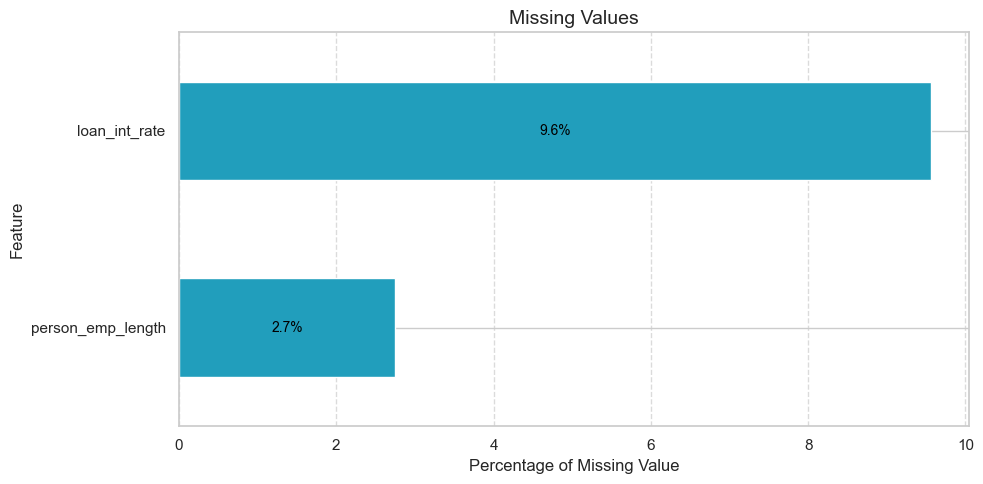

✅ Missing value plot saved.


In [14]:
plot_missing_pct(df)

In [15]:
def plot_conditional_missing_pct(df: pd.DataFrame, save_path: str = "../reports/figures/missing_values_person_emp_length_by_loan_grade.png") -> None:
    try:
        subset = df[df['person_emp_length'].isna()]
        grade_pct = subset['loan_grade'].value_counts(normalize=True) * 100
        grade_pct = grade_pct.sort_values()

        if grade_pct.empty:
            print("⚠️ No missing 'person_emp_length' rows to analyze.")
            return

        # Seaborn color palette
        #colors = sns.color_palette()[:len(grade_pct)]
        colors = sns.color_palette()[0]

        # Plot
        ax = grade_pct.plot(kind='barh', figsize=(8, 6), color=colors)

        plt.title("Missing Values Inside Person Employment Length by Loan Grade", fontsize=13)
        plt.xlabel("Percentage of Missing person_emp_length")
        plt.ylabel("Loan Grade")
        plt.grid(axis='x', linestyle='--', alpha=0.6)

        # Annotate bars
        for i, (val, idx) in enumerate(zip(grade_pct.values, grade_pct.index)):
            xpos = val / 2 if val > 7 else val + 0.2  # Add offset if bar is small
            ax.text(xpos, i, f"{val:.1f}%", va='center', ha='left', color='black', fontsize=10)
            #ax.text(val / 2, i, f"{val:.1f}%", va='center', ha='center', fontsize=10)

        plt.tight_layout()
        plt.savefig(save_path, bbox_inches='tight')
        plt.show()

        print("✅ Conditional missing value plot saved.")

    except Exception as e:
        print(f"❌ Error in plot_conditional_missing_pct: {e}")


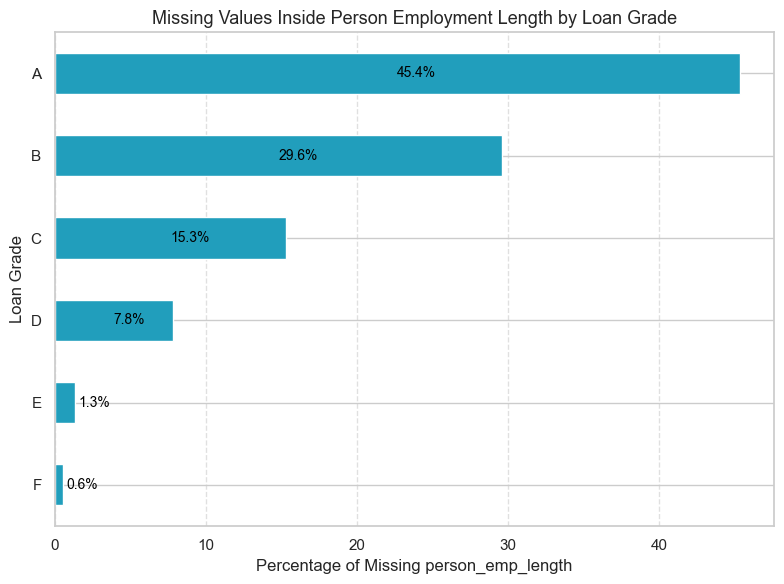

✅ Conditional missing value plot saved.


In [16]:
plot_conditional_missing_pct(df)

In [17]:
df[df['loan_int_rate'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


#### Answer
There are missing values in the `person_emp_length` and `loan_int_rate` variables.
1. Missing values in `person_emp_length` may indicate unemployment or self-employment. To address this, they are filled with 0 values. Further analysis revealed that most applicants with missing `person_emp_length` have high loan_grade, with approximately 75% falling into grades A and B. This suggests they could be either **business owners or unemployed with alternative income sources**.
2. Missing values in `loan_int_rate` may result from human or system errors. Further investigation is needed to determine the cause. **For this project, missing values are replaced with the mean or median, based on the data distribution**.


In [18]:
# ---------------- UNIVARIATE PLOTS ----------------
def plot_univariate(df, col, hue=None, bins=30):
    """
    Visualize the distribution of a single variable (univariate analysis).
    - For categorical variables: horizontal bar plot showing proportion of each category.
    - For numerical variables: histogram with KDE and a boxplot.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data.

    col : str
        The column name to be visualized.

    hue : str, optional
        Currently unused for categorical proportion plots. Reserved for future use.

    bins : int, optional
        Number of bins to use for the histogram if the variable is numerical (default is 30).

    Returns
    -------
    None
        Displays and saves the plot(s) as PNG files in '../reports/figures/'.
    """
    try:
        if df[col].dtype == "object":
            # Categorical: percentage plot (normalized value counts)
            percentages = df[col].value_counts(normalize=True).sort_values(ascending=True) * 100
            fig, ax = plt.subplots(figsize=(6, 4))
            percentages.plot(kind="barh", ax=ax, color=sns.color_palette()[0])
            ax.set_title(f"Percentage of Categories in {col}")
            ax.set_xlabel("Percentage (%)")
            ax.set_ylabel(col)
            # Annotate fractional percentage at center of bars
            for i, (cat, val) in enumerate(percentages.items()):
                ax.text(val / 2, i, f"{val:.1f}%", va='center', ha='left', color='black', fontsize=10)
                        
            # Save the figure
            output_dir = "../reports/figures"
            os.makedirs(output_dir, exist_ok=True)
            filename = f"{output_dir}/percentage_distribution_univariate_{col}.png"
            plt.savefig(filename, bbox_inches='tight')
            print(f"✅ Saved percentage distribution of {col} to {filename}")           
            plt.show()
        else:
            # Numerical: histogram + boxplot
            fig, ax = plt.subplots(1, 2, figsize=(12,5))
            
            # Histogram with KDE
            sns.histplot(df[col], bins=bins, kde=True, ax=ax[0],
                        color=sns.color_palette()[0])
            ax[0].axvline(df[col].median(), ls="--", lw=1.4, c="black", label=f"Median: {df[col].median():.2f}")
            ax[0].legend()
            ax[0].set_title(f'Distribution of {col}')
            
            # Boxplot
            sns.boxplot(x=df[col], ax=ax[1], color=sns.color_palette()[0])
            ax[1].set_title(f'Boxplot of {col}')
            plt.tight_layout(pad=2.0)

            # Save the figure
            output_dir = "../reports/figures"
            os.makedirs(output_dir, exist_ok=True)
            filename = f"{output_dir}/histogram_boxplot_of_{col}.png"
            plt.savefig(filename, bbox_inches='tight')
            print(f"✅ Saved histogram and boxplot of {col} to {filename}")
            plt.show()
    except Exception as e:
        print(f"❌ Error in plot_univariate for {col}: {e}")

### How is the distribution for the numerical predictor variable? Are there any outliers or anomalies?

✅ Saved histogram and boxplot of person_age to ../reports/figures/histogram_boxplot_of_person_age.png


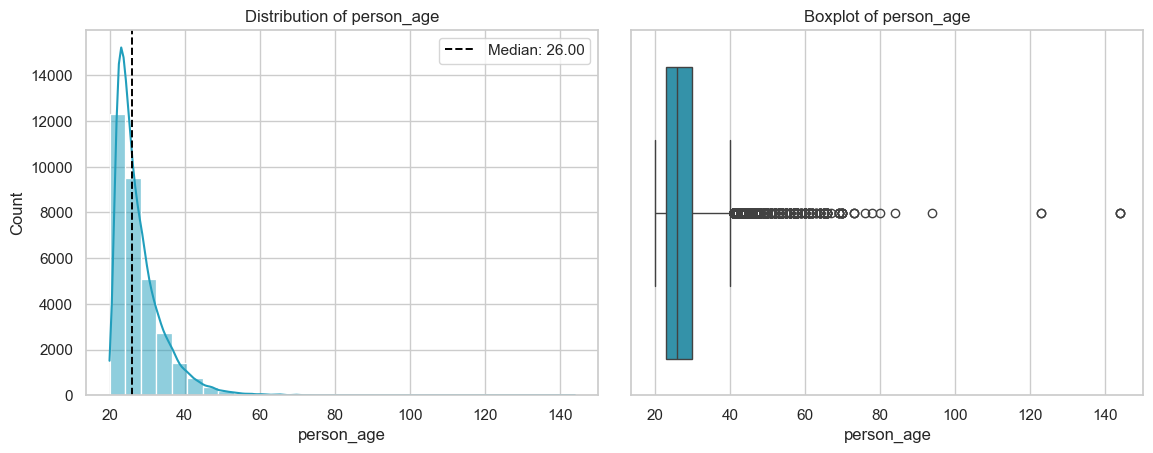

✅ Saved histogram and boxplot of person_income to ../reports/figures/histogram_boxplot_of_person_income.png


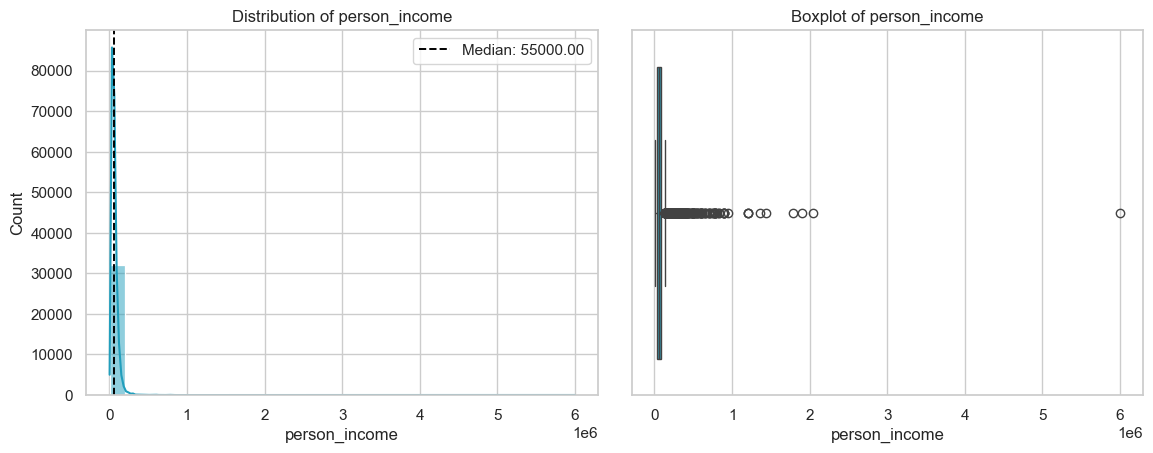

✅ Saved histogram and boxplot of person_emp_length to ../reports/figures/histogram_boxplot_of_person_emp_length.png


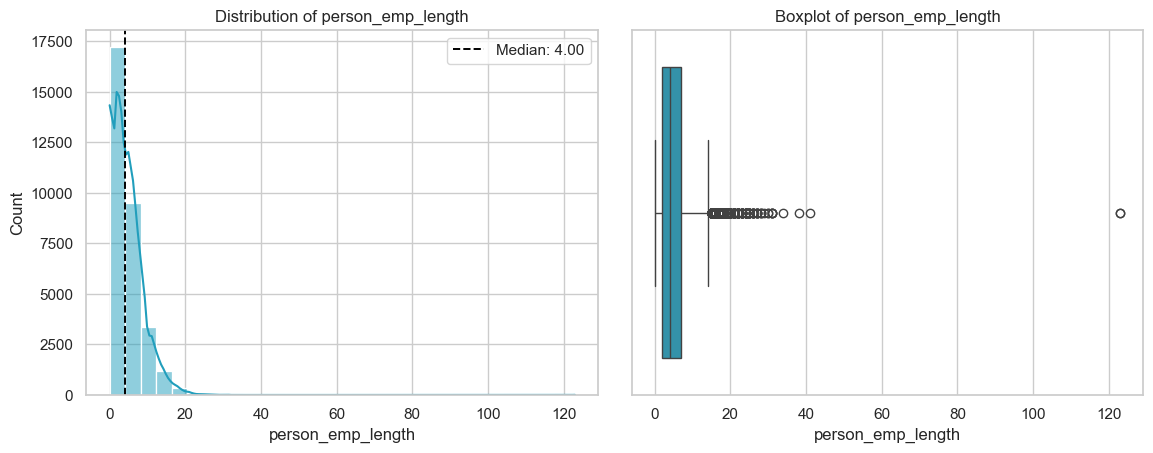

✅ Saved histogram and boxplot of loan_amnt to ../reports/figures/histogram_boxplot_of_loan_amnt.png


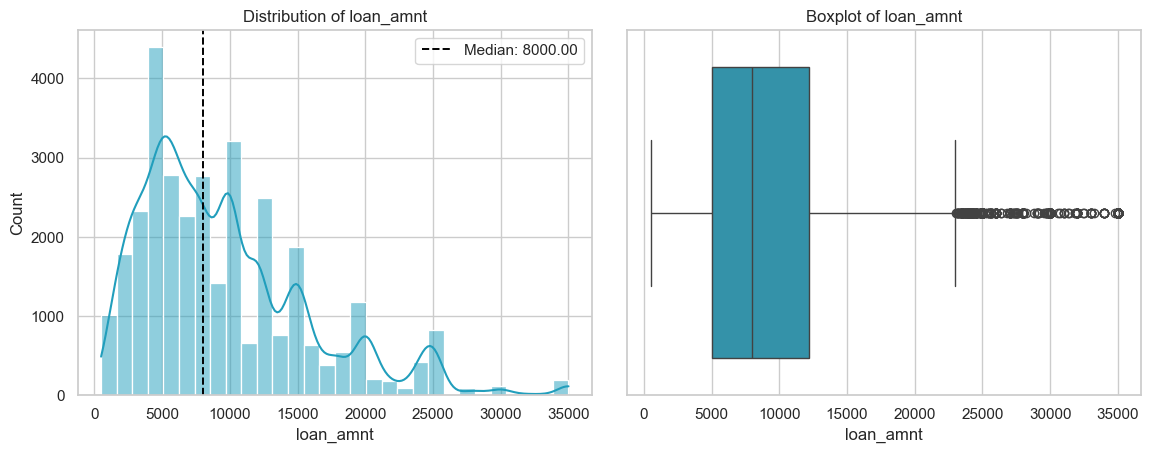

✅ Saved histogram and boxplot of loan_int_rate to ../reports/figures/histogram_boxplot_of_loan_int_rate.png


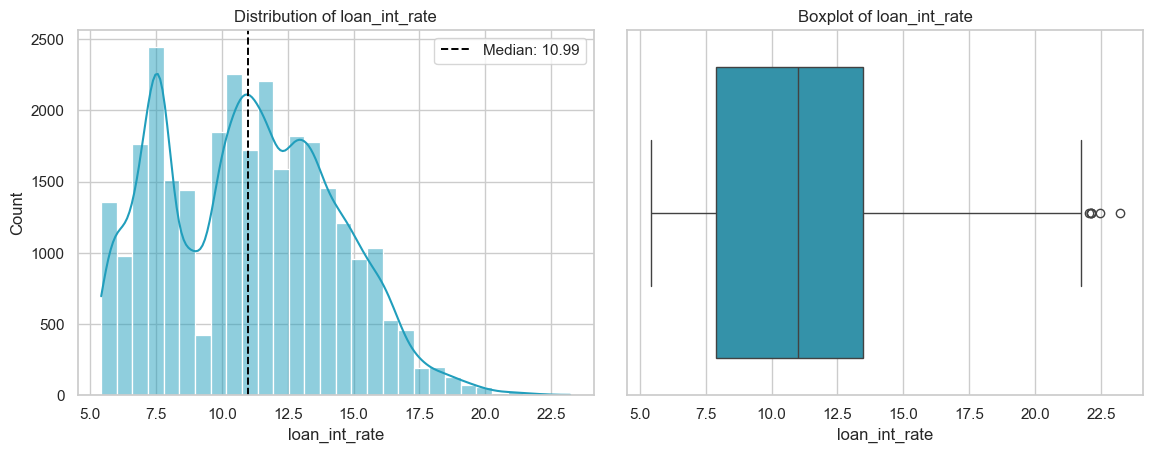

✅ Saved histogram and boxplot of loan_percent_income to ../reports/figures/histogram_boxplot_of_loan_percent_income.png


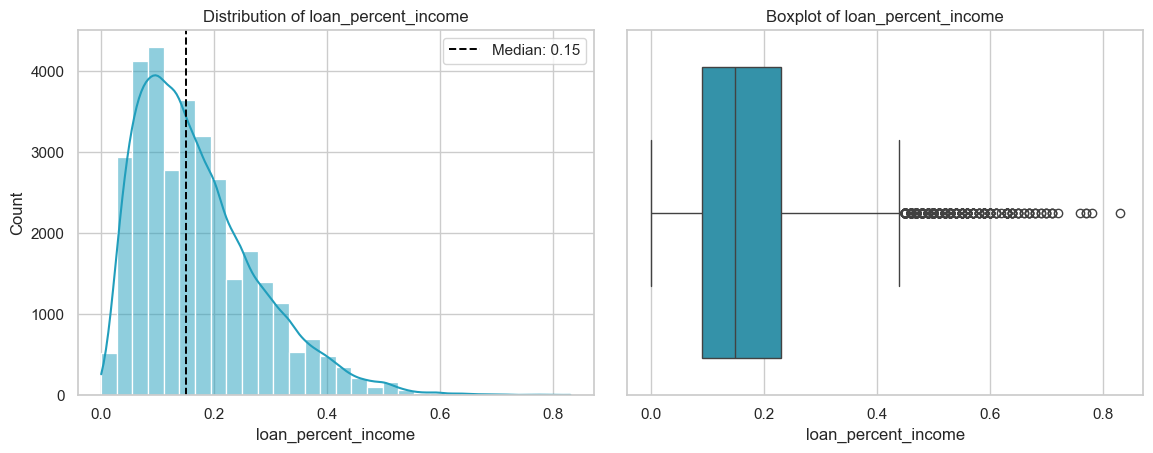

✅ Saved histogram and boxplot of cb_person_cred_hist_length to ../reports/figures/histogram_boxplot_of_cb_person_cred_hist_length.png


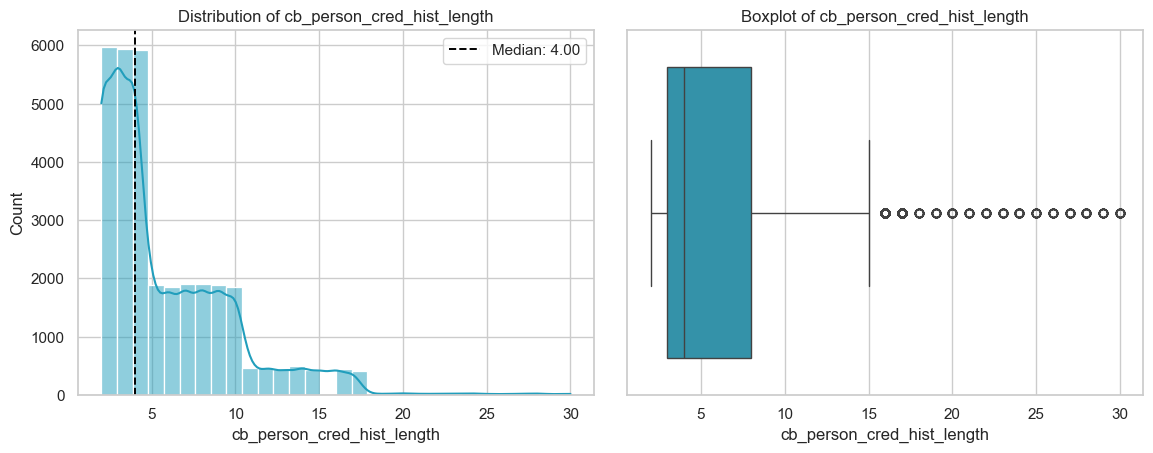

In [19]:
for col in df.select_dtypes("number").columns:
    if col != "loan_status":
        plot_univariate(df,col)

In [20]:
def get_skewed_features(df: pd.DataFrame, exclude_col: str = 'loan_status') -> pd.DataFrame:
    skew_data = {
        col: round(df[col].skew(), 2)
        for col in df.select_dtypes(include='number').columns
        if col != exclude_col
    }
    return pd.DataFrame(skew_data.items(), columns=['Feature', 'Skew']).sort_values(by='Skew', ascending=False)

In [21]:
get_skewed_features(df)

,Feature,Skew
1,person_income,32.87
2,person_emp_length,2.61
0,person_age,2.58
6,cb_person_cred_hist_length,1.66
3,loan_amnt,1.19
5,loan_percent_income,1.06
4,loan_int_rate,0.21


## 📈 Interpretation:
| Skewness Value | Shape            | Interpretation                                          |
| -------------- | ---------------- | ------------------------------------------------------- |
| `> 0`          | **Right-skewed** | Long tail to the right (many low values, few high ones) |
| `< 0`          | **Left-skewed**  | Long tail to the left (many high values, few low ones)  |
| `≈ 0`          | **Symmetric**    | Distribution is fairly balanced                         |

## 📊 Skewness Interpretation Summary
| Feature                            | Skewness | Skew Type                | Interpretation                                                              |
| ---------------------------------- | -------- | ------------------------ | --------------------------------------------------------------------------- |
| **person\_income**                 | 32.87    | **Heavily** right-skewed | Extremely concentrated around low incomes; some very high income outliers.  |
| **person\_emp\_length**            | 2.61     | Right-skewed             | Most people have short job histories; a few have long ones.                 |
| **person\_age**                    | 2.58     | Right-skewed             | Most people are younger; few older outliers (long right tail).              |
| **cb\_person\_cred\_hist\_length** | 1.66     | Right-skewed             | Most people have shorter credit histories; few have long credit experience. |
| **loan\_amnt**                     | 1.19     | Moderately right-skewed  | Most loans are for smaller amounts; some large loans exist.                 |
| **loan\_percent\_income**          | 1.06     | Moderately right-skewed  | Most borrowers have small loan/income ratios; a few have high ratios.       |
| **loan\_int\_rate**                | 0.21     | Slightly right-skewed    | Fairly symmetric; could be left untransformed.                              |




In [22]:
df[df["person_age"] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


Suspected outliers are detected in the `person_age` variable, where the maximum observed age is 100 years old. To address this issue, records with a `person_age` above 100 are removed.

In [23]:
df[df["person_emp_length"] > df["person_age"]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


Outliers are also present in the `person_emp_length` variable, where values exceed a realistic employment duration, such as 123 years for applicants aged 21 and 22. To address this, we can either remove these records or replace the outliers with the average employment duration for applicants within the same age range.

In [24]:
df[df["cb_person_cred_hist_length"] > df["person_age"]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


Checking if there are loan applications have a credit history way longer than their age.

#### Answer
**Positive outliers are observed in all predictor variables, resulting in right-skewed distributions. Some of these outliers are explainable**:
1. `person_income`: High net worth individuals (HNWIs) contribute to the skewness in income distributions.
2. `loan_amnt`: Borrowers with higher incomes may seek larger loan amounts.
3. `loan_int_rate`: Higher loan interest rates may apply to customers perceived as high-risk.
4. `loan_percent_income`: Some borrowers may request loans closer to their income percentage, potentially due to emergencies.
5. `cb_person_cred_hist_length`: Some individuals have exceptionally long credit histories.

**Anomalies in the data include**:
1. `person_age`: While the oldest recorded individuals lived to 100 years, some entries in the dataset exceed this limit. To address this, records with `person_age` above 100 are removed, as they represent only a small fraction of the dataset (5 records).
2. `person_emp_length`: It's impossible for loan applicants aged 21 and 22 to have worked for 123 years. To rectify this, replace these outlier values with the common employment duration for their age range.

### How is the occurence of categorical predictor variable?

✅ Saved percentage distribution of person_home_ownership to ../reports/figures/percentage_distribution_univariate_person_home_ownership.png


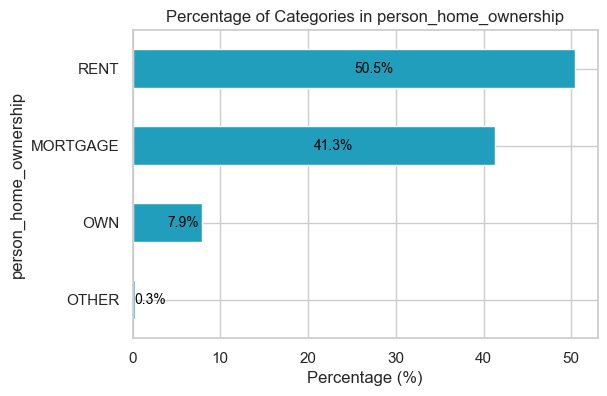

✅ Saved percentage distribution of loan_intent to ../reports/figures/percentage_distribution_univariate_loan_intent.png


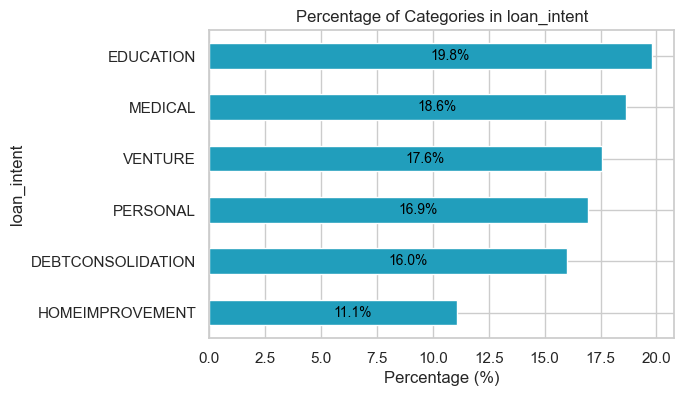

✅ Saved percentage distribution of loan_grade to ../reports/figures/percentage_distribution_univariate_loan_grade.png


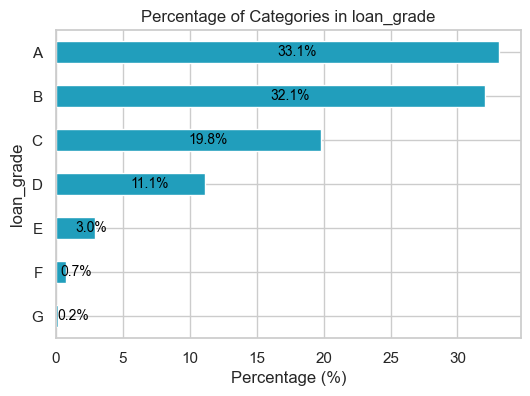

✅ Saved percentage distribution of cb_person_default_on_file to ../reports/figures/percentage_distribution_univariate_cb_person_default_on_file.png


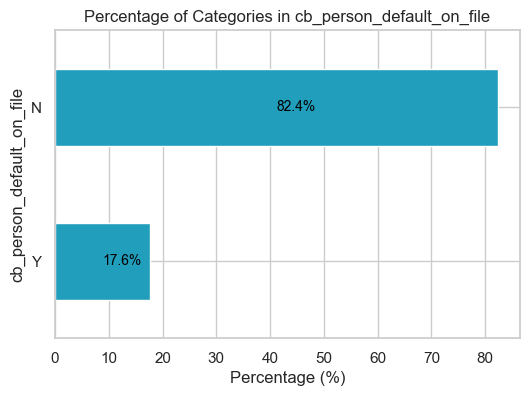

In [25]:
for col in df.select_dtypes("object").columns:
    plot_univariate(df,col)

#### Answer
The occurences of:
1. `person_home_ownership` around 90% of loan applications still don't own a property or home where 50% of them is still renting and 40% of them still on mortgage.
2. `loan_intent` are almost distributed evenly around each category.
3. `loan_grade` around 65% of the loan applicants has a good loan grade, A and B.
4. `cb_person_default_on_file` almost 20% of the customers had history of credit default. 

## Multivariate Analysis

### What is the distribution of the numerical predictor variable across different classes of the response target variable?

In [26]:
def plot_dist_by_target(df: pd.DataFrame, feature: str, target: str = 'loan_status', figsize=(12, 5)) -> None:
    """
    Visualize the distribution of a numerical feature by a target variable.
    Shows KDE plot and a vertical boxplot.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame.
    feature : str
        The numerical column to plot.
    target : str, optional
        The target column to group by (default is 'loan_status').
    figsize : tuple
        Size of the overall figure.

    Returns
    -------
    None
        Displays and saves the plot as a PNG file.
    """
    try:
        fig, axes = plt.subplots(1, 2, figsize=figsize)

        # KDE plot
        sns.kdeplot(data=df, x=feature, hue=target, ax=axes[0], fill=False, linewidth=2.0,)
        axes[0].set_title(f'Density of {feature} by {target}')
        #axes[0].legend(title=target)

        # Vertical boxplot
        sns.boxplot(data=df, x=target, y=feature, hue=target, ax=axes[1])
        axes[1].set_title(f'{feature} vs {target} (Boxplot)')
        axes[1].legend(title=target, loc='best')

        plt.tight_layout()

        # Save the figure
        output_dir = "../reports/figures"
        os.makedirs(output_dir, exist_ok=True)
        filename = f"{output_dir}/distribution_by_{feature}_vs_{target}.png"
        plt.savefig(filename, bbox_inches='tight')
        print(f"✅ Plot saved to {filename}")

        plt.show()

    except Exception as e:
        print(f"❌ Error in plot_dist_by_target for {feature}: {e}")


✅ Plot saved to ../reports/figures/distribution_by_person_age_vs_loan_status.png


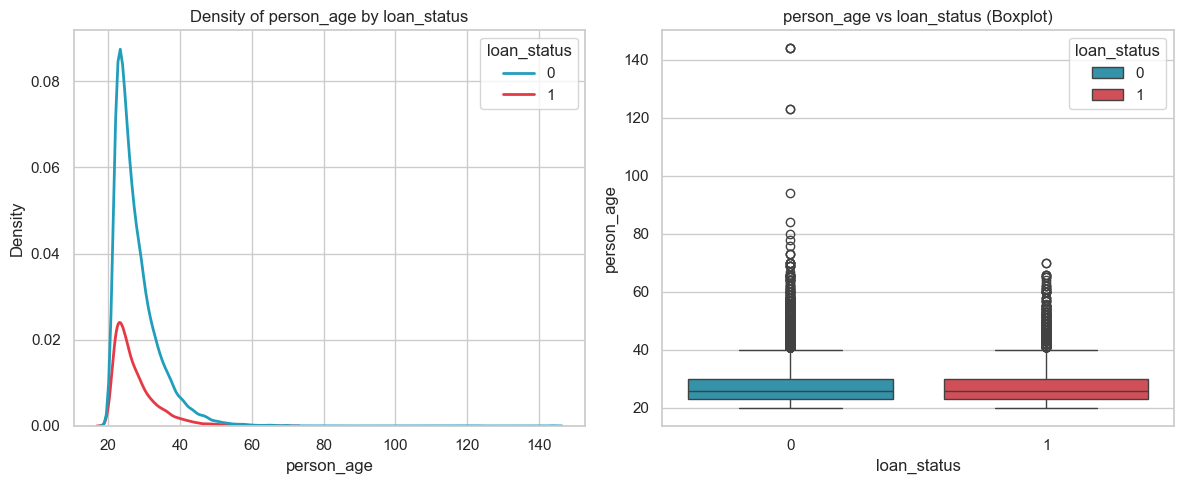

✅ Plot saved to ../reports/figures/distribution_by_person_income_vs_loan_status.png


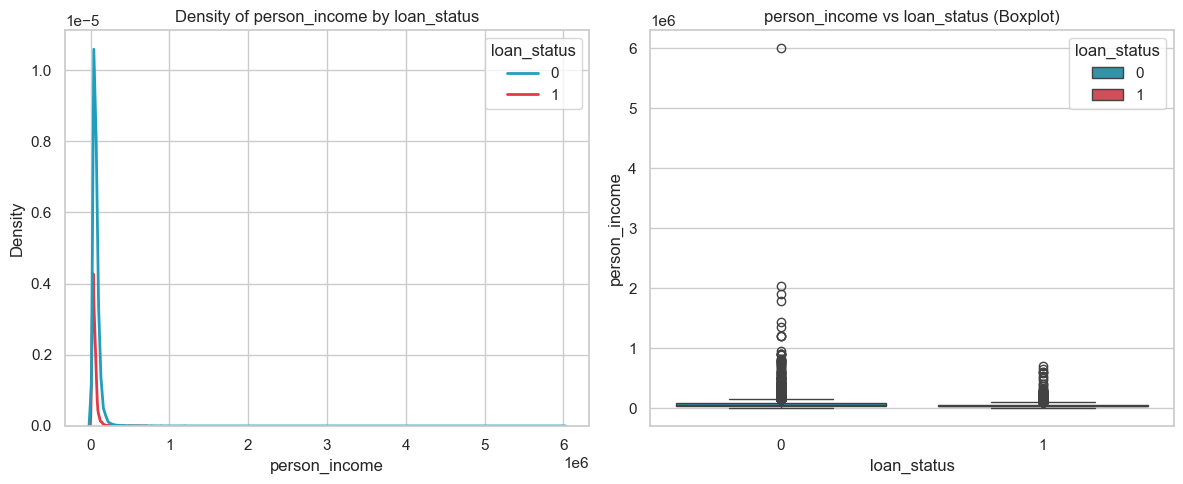

✅ Plot saved to ../reports/figures/distribution_by_person_emp_length_vs_loan_status.png


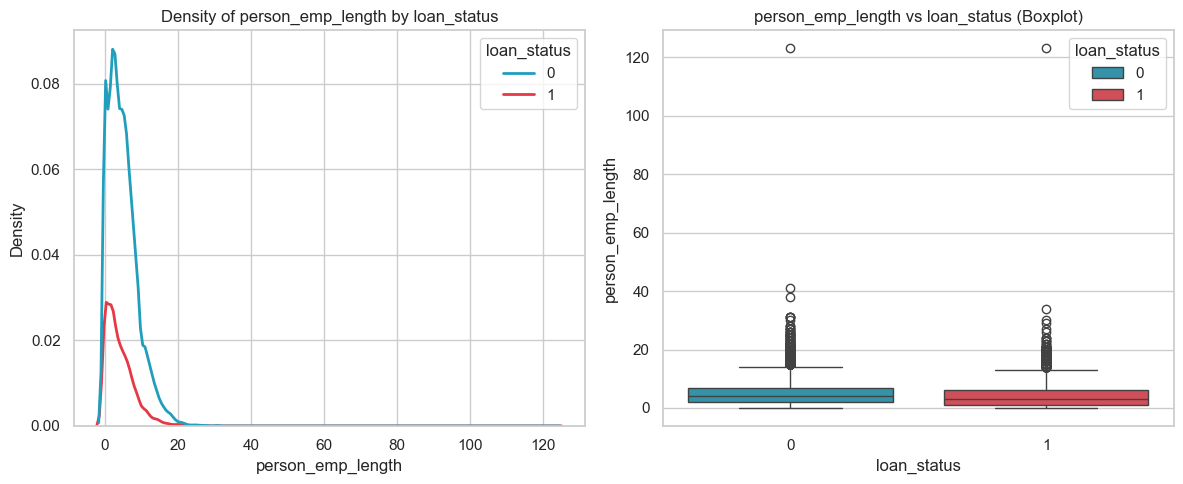

✅ Plot saved to ../reports/figures/distribution_by_loan_amnt_vs_loan_status.png


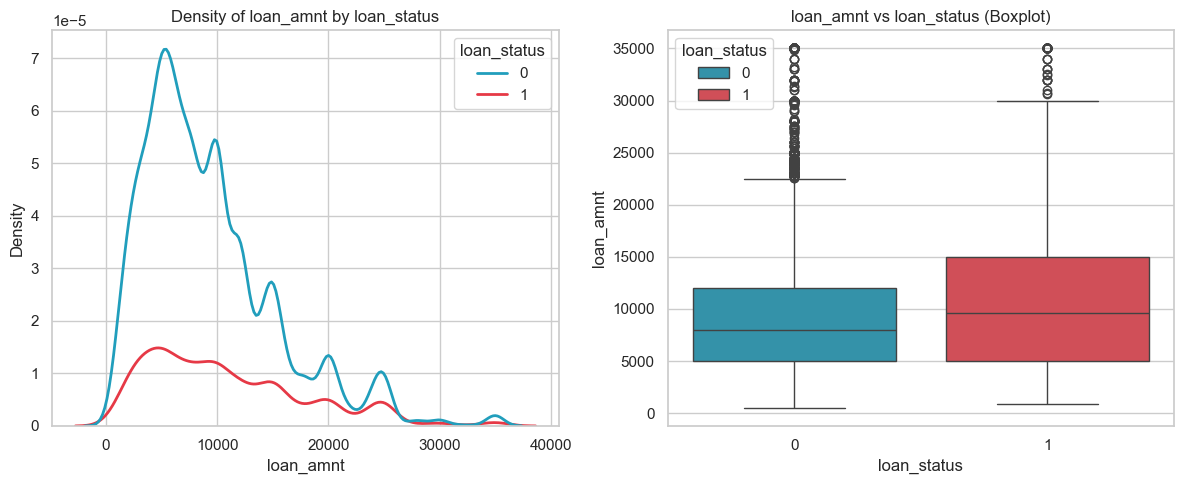

✅ Plot saved to ../reports/figures/distribution_by_loan_int_rate_vs_loan_status.png


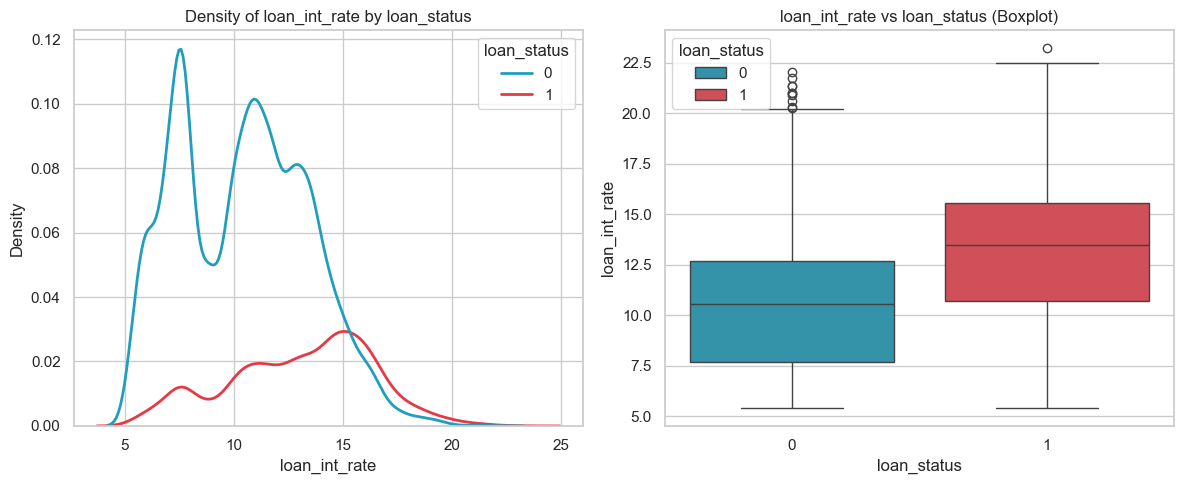

✅ Plot saved to ../reports/figures/distribution_by_loan_percent_income_vs_loan_status.png


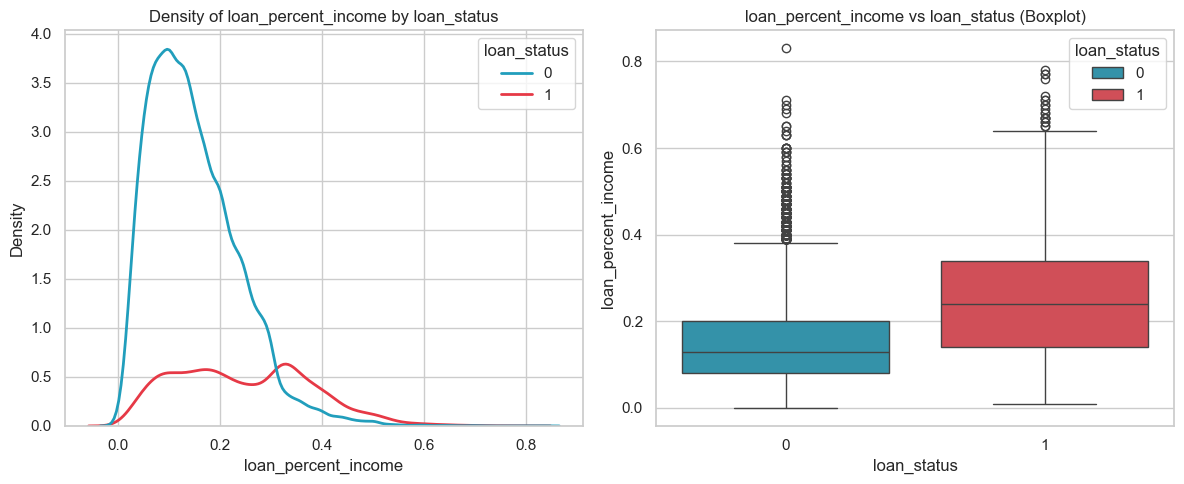

✅ Plot saved to ../reports/figures/distribution_by_cb_person_cred_hist_length_vs_loan_status.png


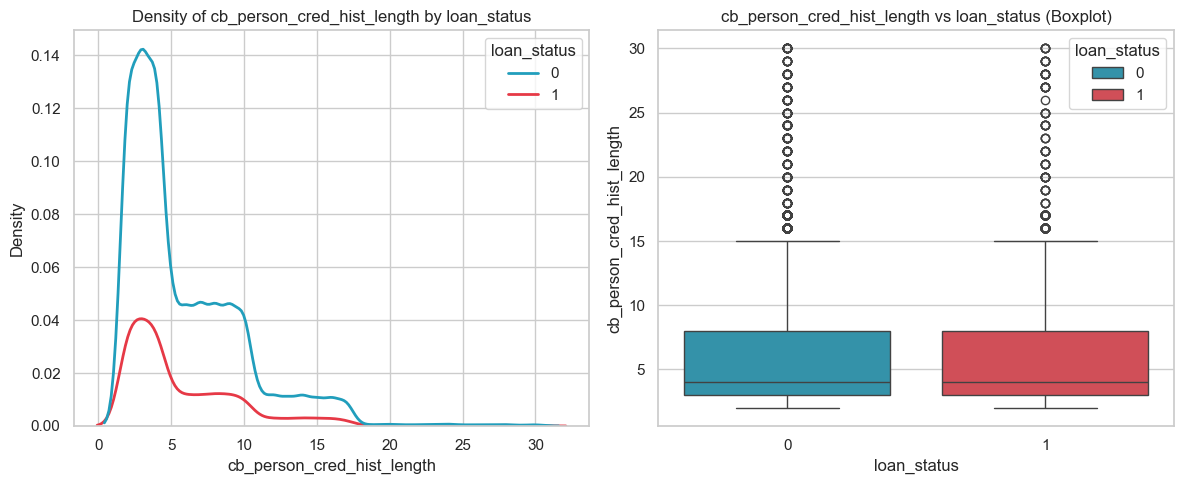

In [27]:
for num_feature in df.select_dtypes("number").columns:
    if num_feature != "loan_status":
        plot_dist_by_target(df, num_feature, target="loan_status")

#### Answer
Distributions of `loan_int_rate` and `loan_percent_income` vary based on the response variable, suggesting that higher values of these features correlate with a higher likelihood of default.

### Do certain categories of the categorical predictor variable have higher or lower probabilities of a specific class in the response variable?

In [28]:
def plot_probability_default_by_category(df: pd.DataFrame, cat_feature: str, target: str = 'loan_status', figsize=(8, 6)) -> None:
    """
    Plot stacked horizontal bar chart showing the percentage probability of default
    (target=1) for each category of a categorical feature.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame.

    cat_feature : str
        Column name of the categorical feature.

    target : str, optional
        Column name of the binary target variable (default 'loan_status').

    figsize : tuple, optional
        Size of the figure (default (8, 6)).

    Returns
    -------
    None
        Displays the plot and saves it as a PNG file.
    """
    try:
        fig, ax = plt.subplots(figsize=figsize)

        # Calculate normalized value counts by category and target, convert to percentage
        percentages = (
            df.groupby(cat_feature)[target]
              .value_counts(normalize=True)
              .unstack()
              .fillna(0)
              * 100
        )
        # Sort by probability of default (class 1) if available
        if 1 in percentages.columns:
            percentages = percentages.sort_values(by=1)

        # Plot stacked horizontal bar chart        
        colors = sns.color_palette()[:2]
        bars = percentages.plot(kind='barh', stacked=True, ax=ax, color=colors)

        # Set labels and title
        ax.set_xlabel('Percentage (%)')
        ax.set_ylabel(cat_feature)
        ax.set_title(f'Probability of Default Given {cat_feature}')
        ax.legend(title=target)

        # Annotate percentages inside each bar segment
        for i, (idx, row) in enumerate(percentages.iterrows()):
            left = 0  # position start for the first segment
            for col in percentages.columns:
                width = row[col]
                if width > 5:  # Only annotate if wide enough to avoid clutter
                    ax.text(
                        left + width / 2,
                        i,
                        f"{width:.1f}%",
                        va='center',
                        ha='center',
                        color='white' if col == 1 else 'black',
                        fontsize=9,
                        fontweight='bold'
                    )
                left += width

        plt.tight_layout()

        # Save the figure
        output_dir = "../reports/figures"
        os.makedirs(output_dir, exist_ok=True)
        filename = f"{output_dir}/probability_default_by_{cat_feature}.png"
        plt.savefig(filename, bbox_inches='tight')
        print(f"✅ Plot saved to {filename}")

        plt.show()

    except Exception as e:
        print(f"❌ Error in plot_probability_default_by_category: {e}")


✅ Plot saved to ../reports/figures/probability_default_by_person_home_ownership.png


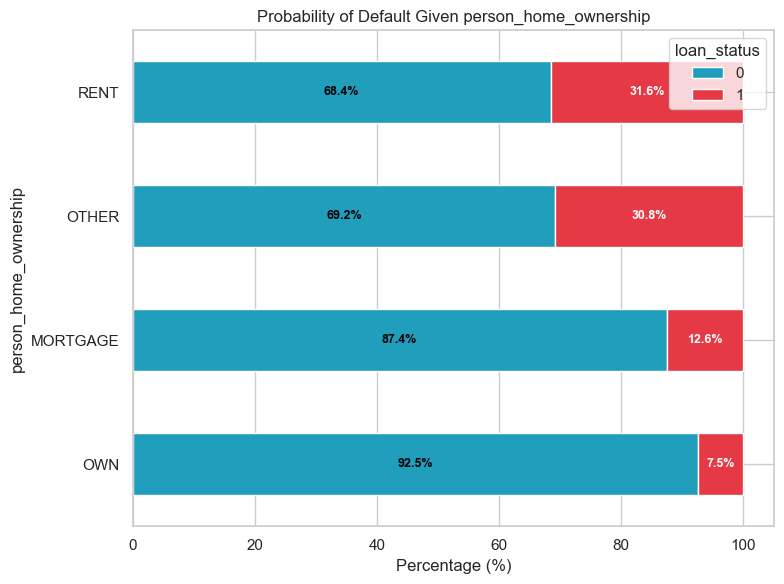

✅ Plot saved to ../reports/figures/probability_default_by_loan_intent.png


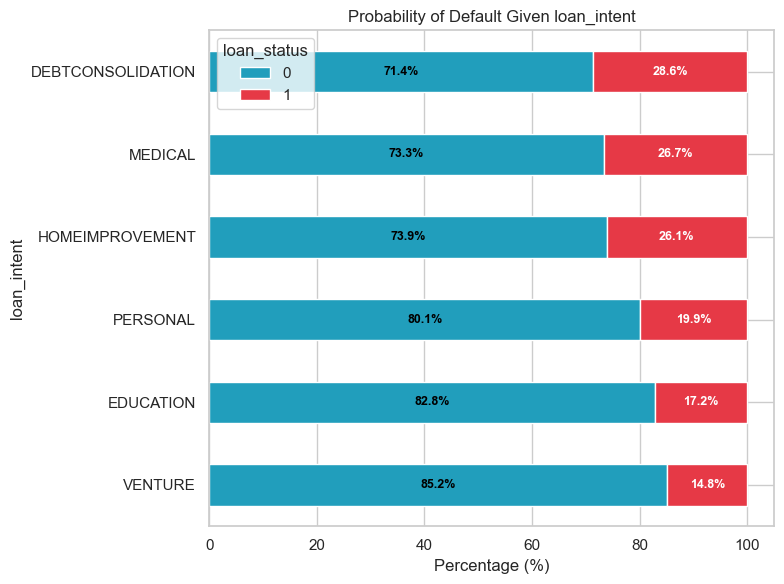

✅ Plot saved to ../reports/figures/probability_default_by_loan_grade.png


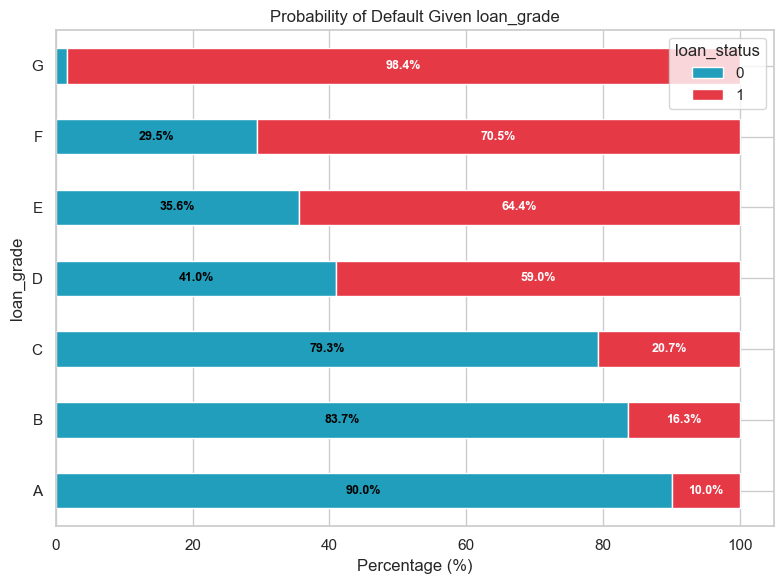

✅ Plot saved to ../reports/figures/probability_default_by_cb_person_default_on_file.png


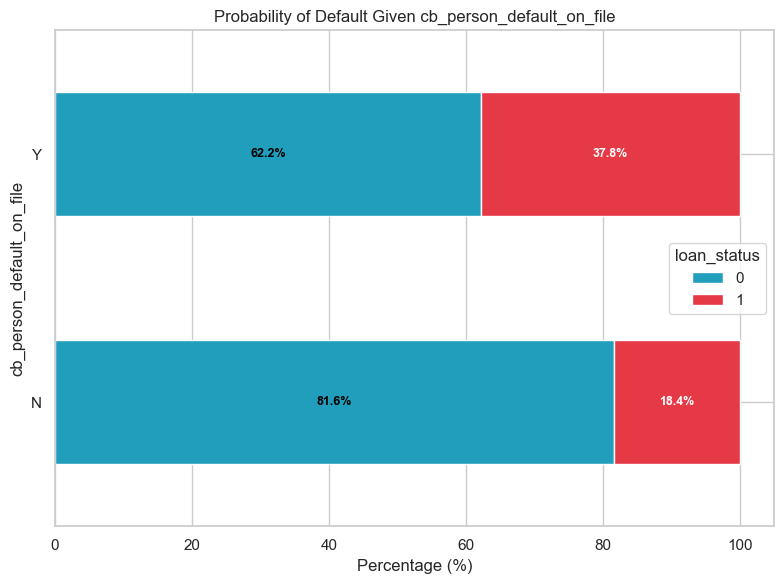

In [29]:
for cat_col in df.select_dtypes("object").columns:
    if cat_col != "loan_status":
        plot_probability_default_by_category(df, cat_col, target="loan_status")

#### Answer
1. `person_home_ownership`: The probability of default is highest among those who still **rent** (32%) and those with **other types** of home ownership (31%).
2. `loan_intent`: The probability of loan default is highest among those who took out loans for **debt consolidation** (29%), followed by **medical needs** (27%), **home improvement** (26%), **personal loans** (20%), **education loans** (17%), and **ventures** (15%).
3. `loan_grade`: The probability of loan default is higher for those who has grade **G** (98%), **F** (71%), **E** (64%), and **D** (59%).
4. `cb_person_default_on_file`: The probability of loan default is higher for those who has history of default (38%).

## How is the correlation amongst numerical predictor variable? (Multicollinearity)
Check if there's an correlation between amongst numerical predictor variables.

In [30]:
def plot_heatmap(df: pd.DataFrame, figsize= (10, 8), save_path: str = "../reports/figures/correlation_matrix_heatmap.png")-> None:

    """
    Plot and save a heatmap visualization of the correlation matrix of numerical features.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the data.

    figsize : Tuple[int, int], optional
        Figure size for the heatmap (default is (10, 8)).

    save_path : str, optional
        File path to save the heatmap image (default is '../reports/figures/correlation_matrix_heatmap.png').

    Returns
    -------
    None
        Displays the heatmap and saves it to disk.
    """
    try:
        # Create output directory if it doesn't exist
        output_dir = os.path.dirname(save_path)
        os.makedirs(output_dir, exist_ok=True)

        fig, ax = plt.subplots(figsize=figsize)

        # Calculate correlation matrix for numerical columns only
        corr = df.select_dtypes(include='number').corr()

        # Plot heatmap with annotations
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
        ax.set_title('Correlation Matrix Heatmap')

        plt.tight_layout()
        plt.savefig(save_path, bbox_inches='tight')
        print(f"✅ Heatmap saved to {save_path}")
        plt.show()

    except Exception as e:
        print(f"❌ Error in plot_heatmap: {e}")


✅ Heatmap saved to ../reports/figures/correlation_matrix_heatmap.png


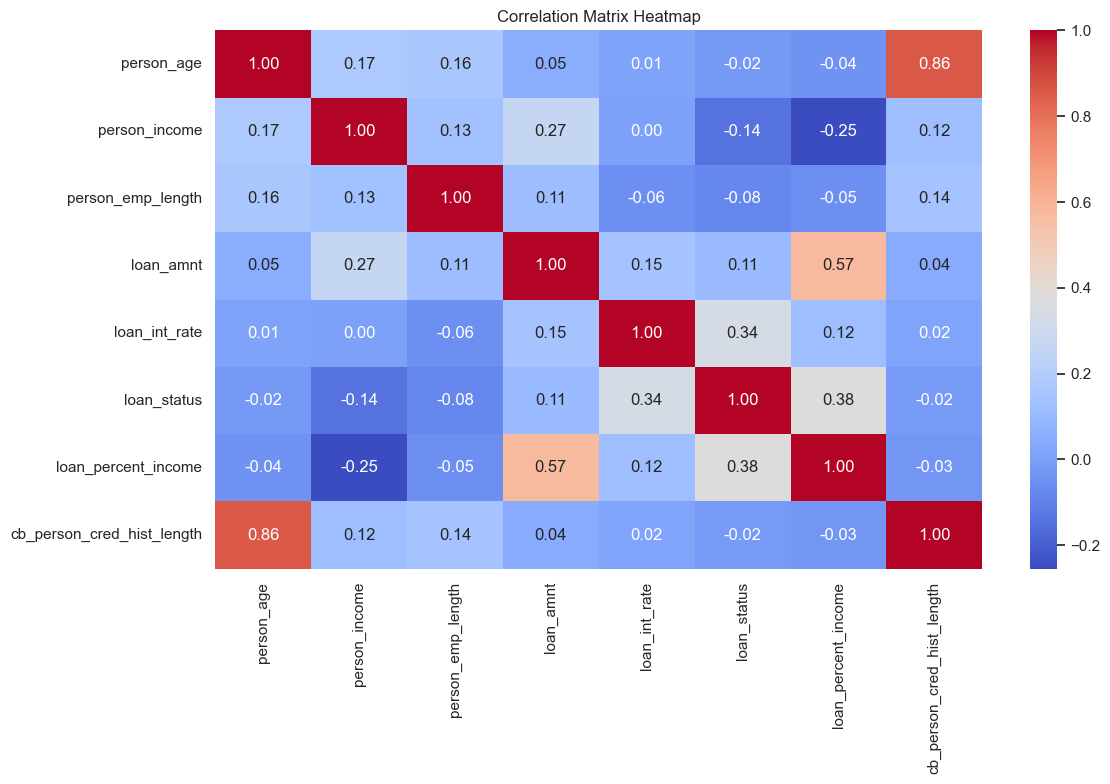

In [31]:
plot_heatmap(df, figsize=(12, 8))

In [32]:
from typing import List, Optional

def plot_pairplot(
    df: pd.DataFrame,
    vars: Optional[List[str]] = None,
    hue: Optional[str] = None,
    diag_kind: str = 'auto',
    kind: str = 'scatter',
    height: float = 2.5
) -> None:
    """
    Create and display a Seaborn pairplot for the given DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the data to plot.

    vars : List[str], optional
        List of columns to include in the pairplot. If None, all numeric columns are used.

    hue : str, optional
        Variable name for color encoding (categorical).

    diag_kind : str, optional
        Kind of plot for diagonal subplots: 'hist', 'kde', or 'auto' (default).

    kind : str, optional
        Kind of plot for off-diagonal subplots: 'scatter' (default) or 'reg'.

    height : float, optional
        Height (in inches) of each facet.

    Returns
    -------
    None
        Displays the pairplot.
    """
    try:
        if vars is None:
            vars = df.select_dtypes(include='number').columns.tolist()

        sns.pairplot(
            df,
            vars=vars,
            hue=hue,
            diag_kind=diag_kind,
            kind=kind,
            height=height
        )

        plt.suptitle('Pair Plot', y=1.02)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error in plot_pairplot: {e}")

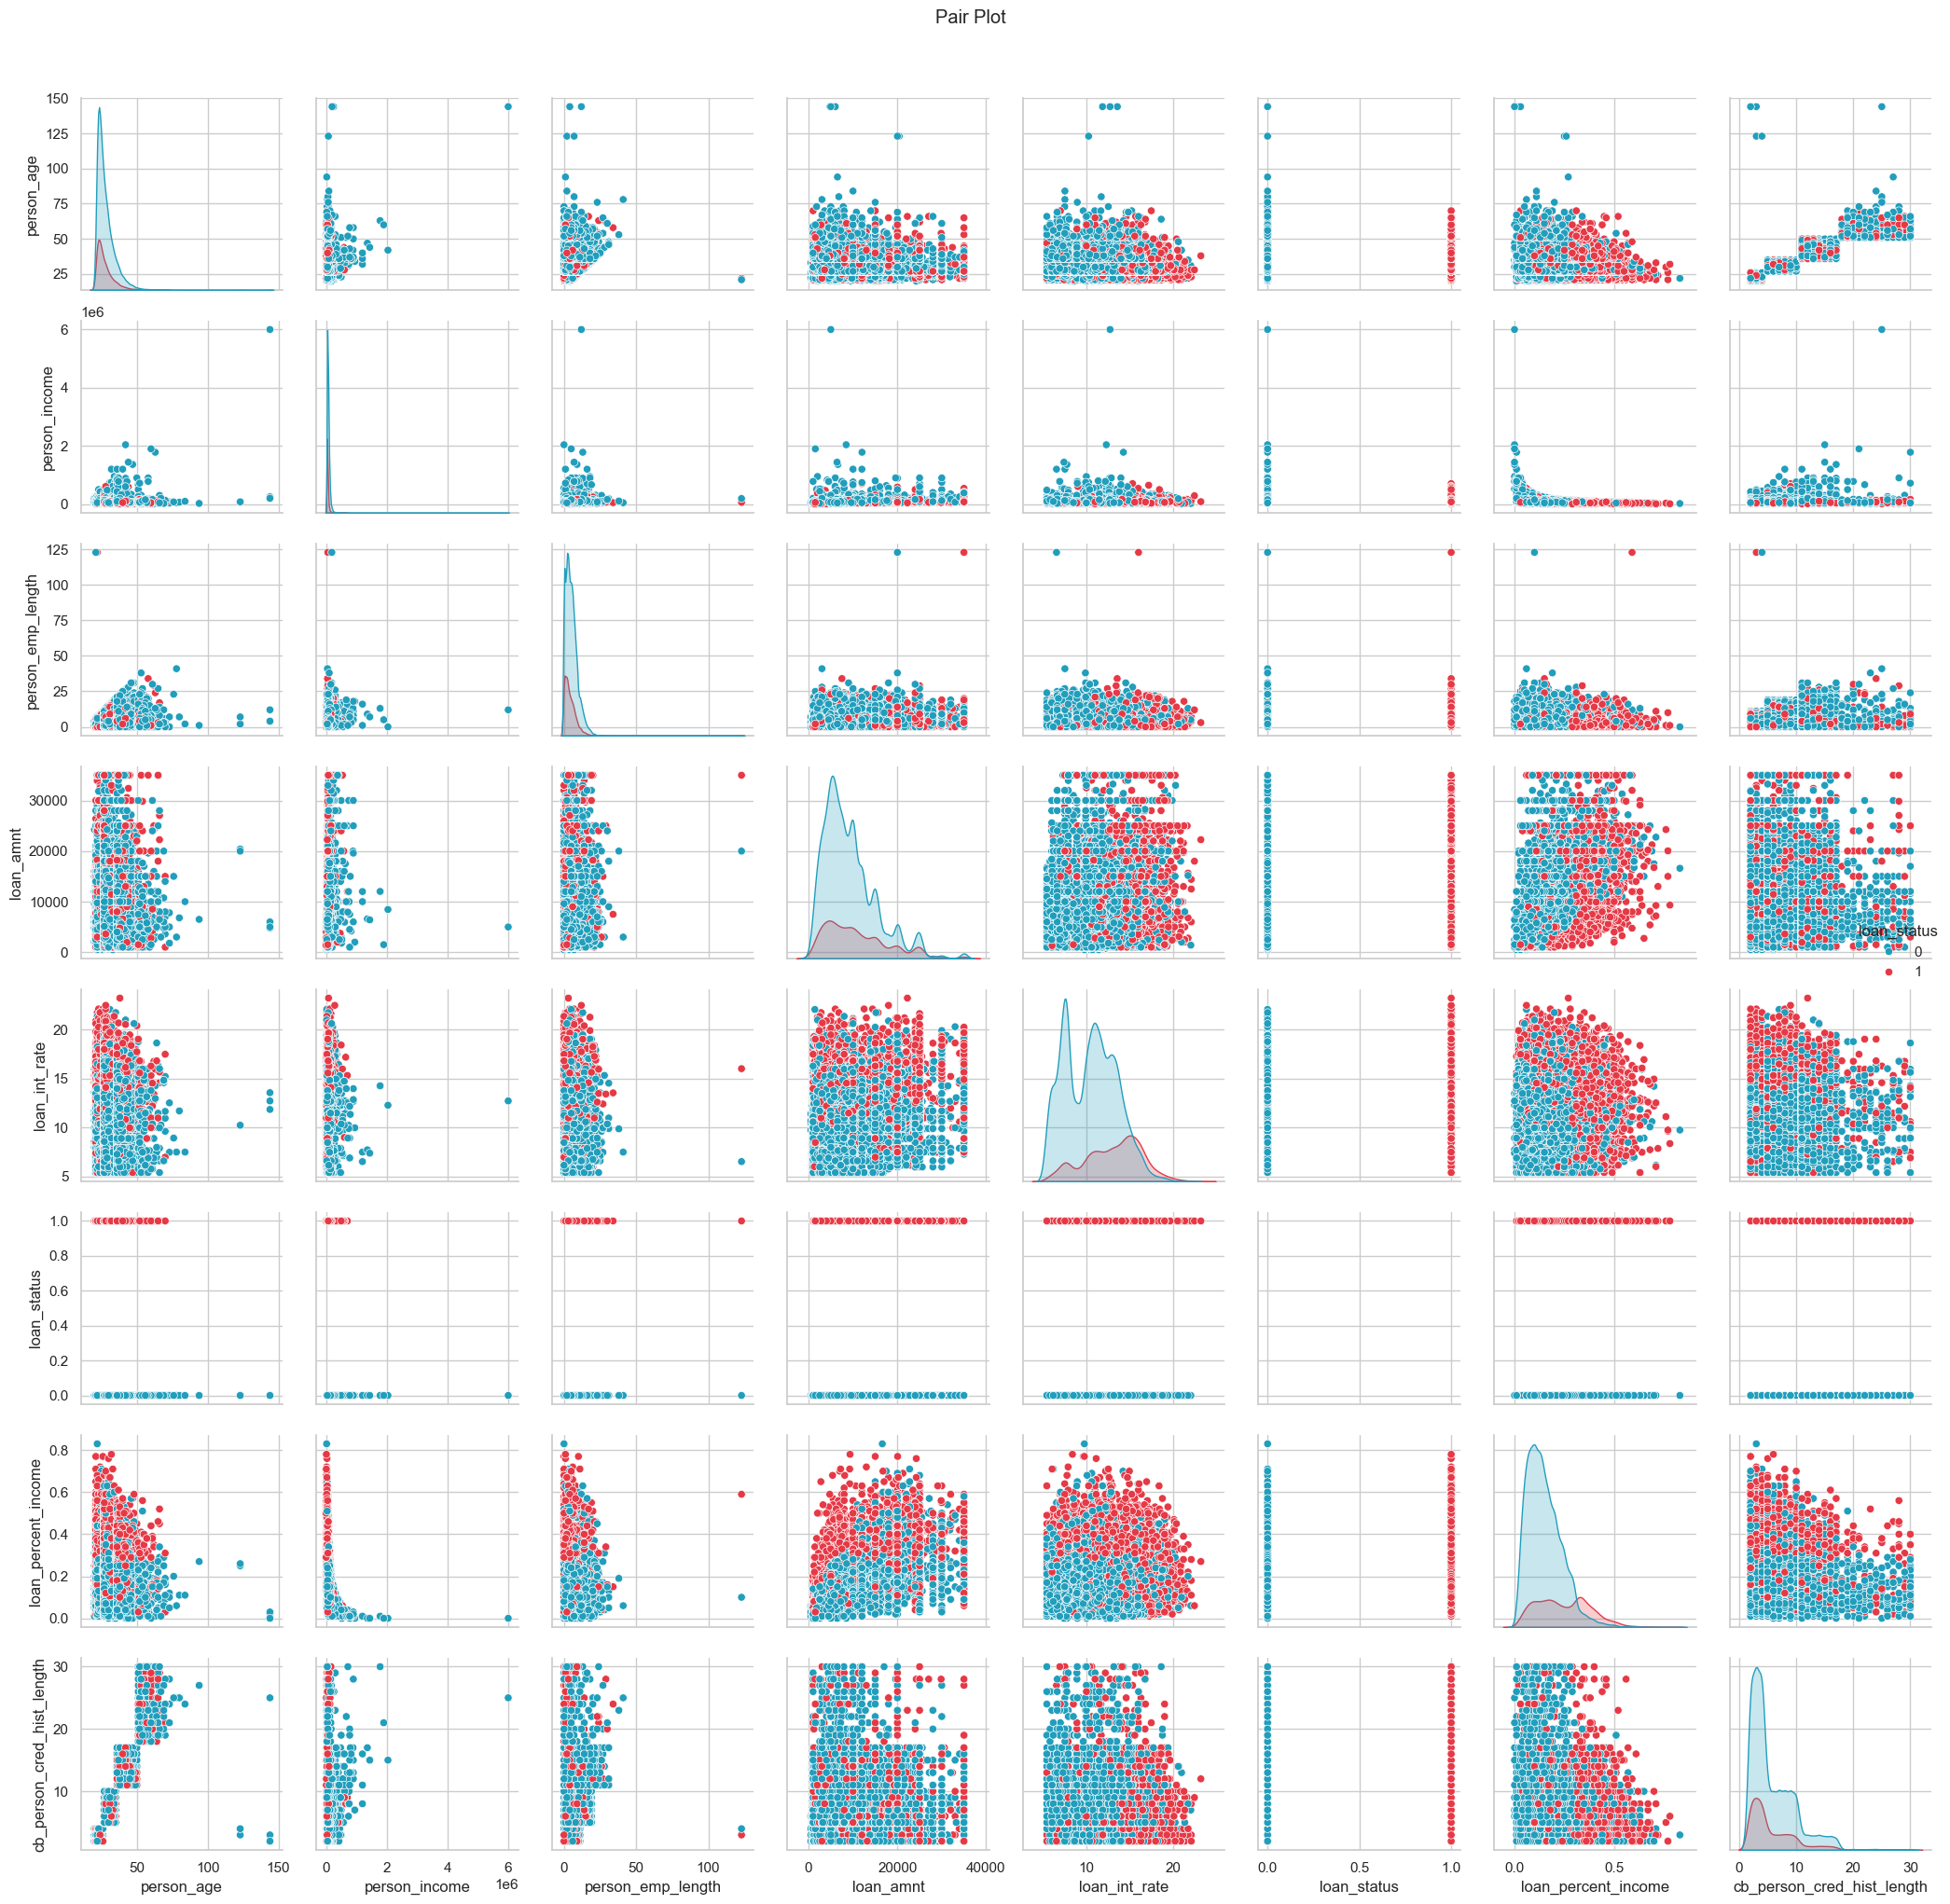

In [33]:
plot_pairplot(df, hue='loan_status')

In [34]:
def plot_scatter(df: pd.DataFrame, x: str, y: str, figsize= (8, 5)) -> None:
    """
    Plot a scatter plot with a regression trend line between two numerical columns.

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe containing the data.
    x : str
        Numerical column for the x-axis.
    y : str
        Numerical column for the y-axis.
    figsize : tuple, optional
        Size of the figure (default (8, 5)).

    Returns
    -------
    None
        Saves and shows the scatter plot with a trend line.
    """
    try:
        fig, ax = plt.subplots(figsize=figsize)

        # Scatterplot
        sns.scatterplot(data=df, x=x, y=y, color='skyblue', ax=ax)

        # Trend line
        sns.regplot(data=df, x=x, y=y, scatter=False, color='orange', ci=None,
                    line_kws={'linewidth': 2}, ax=ax)

        # Labels and title
        ax.set_title(f"Scatter Plot: {x} vs {y}", fontsize=14)
        ax.set_xlabel(x)
        ax.set_ylabel(y)

        # Save figure
        output_dir = "../reports/figures"
        os.makedirs(output_dir, exist_ok=True)
        filename = f"{output_dir}/scatter_plot_{x}_vs_{y}.png"
        plt.tight_layout()
        plt.savefig(filename, bbox_inches='tight')
        print(f"✅ Plot saved to {filename}")

        plt.show()

    except Exception as e:
        print(f"❌ Error creating scatter plot for {x} vs {y}: {e}")

✅ Plot saved to ../reports/figures/scatter_plot_person_age_vs_cb_person_cred_hist_length.png


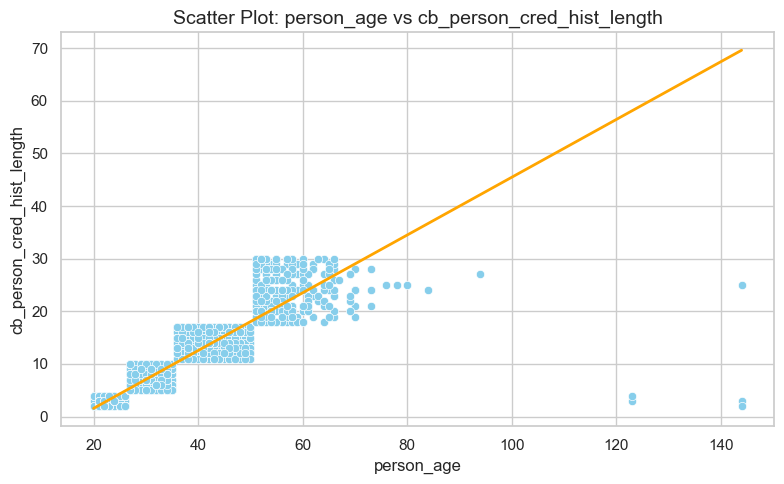

In [35]:
plot_scatter(df, "person_age", "cb_person_cred_hist_length")

✅ Plot saved to ../reports/figures/scatter_plot_loan_amnt_vs_loan_percent_income.png


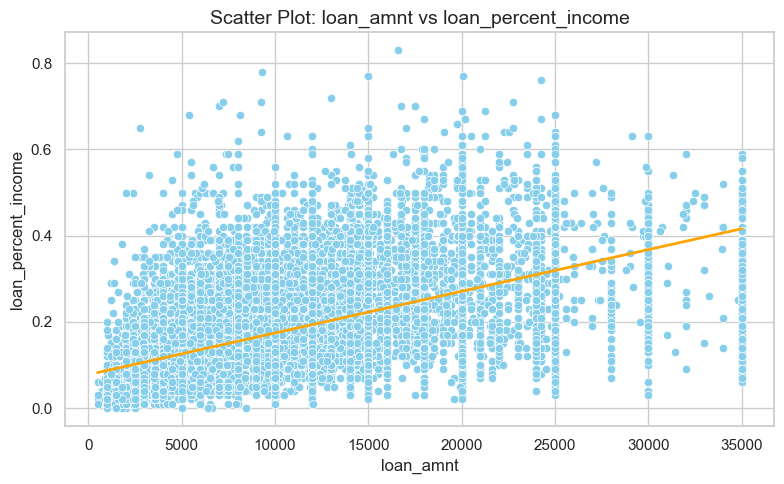

In [36]:
plot_scatter(df, "loan_amnt", "loan_percent_income")

#### Answer
There are multicollinearity amongst numerical predictor variable, such as: `person_age` vs `cb_person_cred_hist_length` and `loan_amnt` vs `loan_percent_income`.